<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/smoker_status_prediction/smoking-banner.jpg">


# PREDICTION OF SMOKER STATUS USING BIO-SIGNALS
---

# Importing Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import os
import requests
import csv
from io import StringIO
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("viridis")

import warnings
warnings.filterwarnings("ignore")

import zipfile

zf = zipfile.ZipFile('/content/train.csv.zip')

In [ ]:
data = pd.read_csv(zf.open('train.csv'),index_col="id")

### About Dataset
---
Dataset Description -
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- dental caries
- smoking [TARGET COLUMN]

Task:  to create a  Machine Learning model to identify the smoking status of an individual using bio-signals.<br>

In [ ]:
data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,smoking,BMI,HDL-LDL Ratio,HDL-triglyceride Ratio,LDL-triglyceride Ratio,Liver Enzyme Ratio
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,22,25,27,0,1,22.038567,0.533333,0.133333,0.250000,0.880000
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,27,23,37,1,0,23.875115,0.452381,1.036364,2.290909,1.173913
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,27,31,53,0,1,25.951557,0.483871,0.228426,0.472081,0.870968
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,20,27,30,1,0,29.320988,0.372549,0.187192,0.502463,0.740741
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,19,13,17,0,1,22.038567,0.473118,0.505747,1.068966,1.461538
5,50,170,55,51.0,1.2,1.2,1,1,146,95,...,24,42,119,1,1,19.031142,0.313131,0.090379,0.288630,0.571429
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,17,12,16,0,0,21.484375,0.565574,0.450980,0.797386,1.416667
7,55,155,60,84.5,0.7,0.9,1,1,137,91,...,16,15,16,0,0,24.973985,0.257576,0.309091,1.200000,1.066667
8,40,165,70,89.0,0.7,1.0,1,1,130,80,...,24,21,31,0,1,25.711662,0.393333,0.361963,0.920245,1.142857


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

# Feature Engineering

In [ ]:
data["BMI"] = data["weight(kg)"] / (data["height(cm)"]/100)**2
data["HDL-LDL Ratio"] = data["HDL"] / data["LDL"]
data["HDL-triglyceride Ratio"] = data["HDL"] / data["triglyceride"]
data["LDL-triglyceride Ratio"] = data["LDL"] / data["triglyceride"]
data["Liver Enzyme Ratio"] = data["AST"] / data["ALT"]

data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,smoking,BMI,HDL-LDL Ratio,HDL-triglyceride Ratio,LDL-triglyceride Ratio,Liver Enzyme Ratio
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,22,25,27,0,1,22.038567,0.533333,0.133333,0.250000,0.880000
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,27,23,37,1,0,23.875115,0.452381,1.036364,2.290909,1.173913
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,27,31,53,0,1,25.951557,0.483871,0.228426,0.472081,0.870968
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,20,27,30,1,0,29.320988,0.372549,0.187192,0.502463,0.740741
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,19,13,17,0,1,22.038567,0.473118,0.505747,1.068966,1.461538



# Exploratory Data Analysis & Visualization


### Plotting Correlation Heatmap

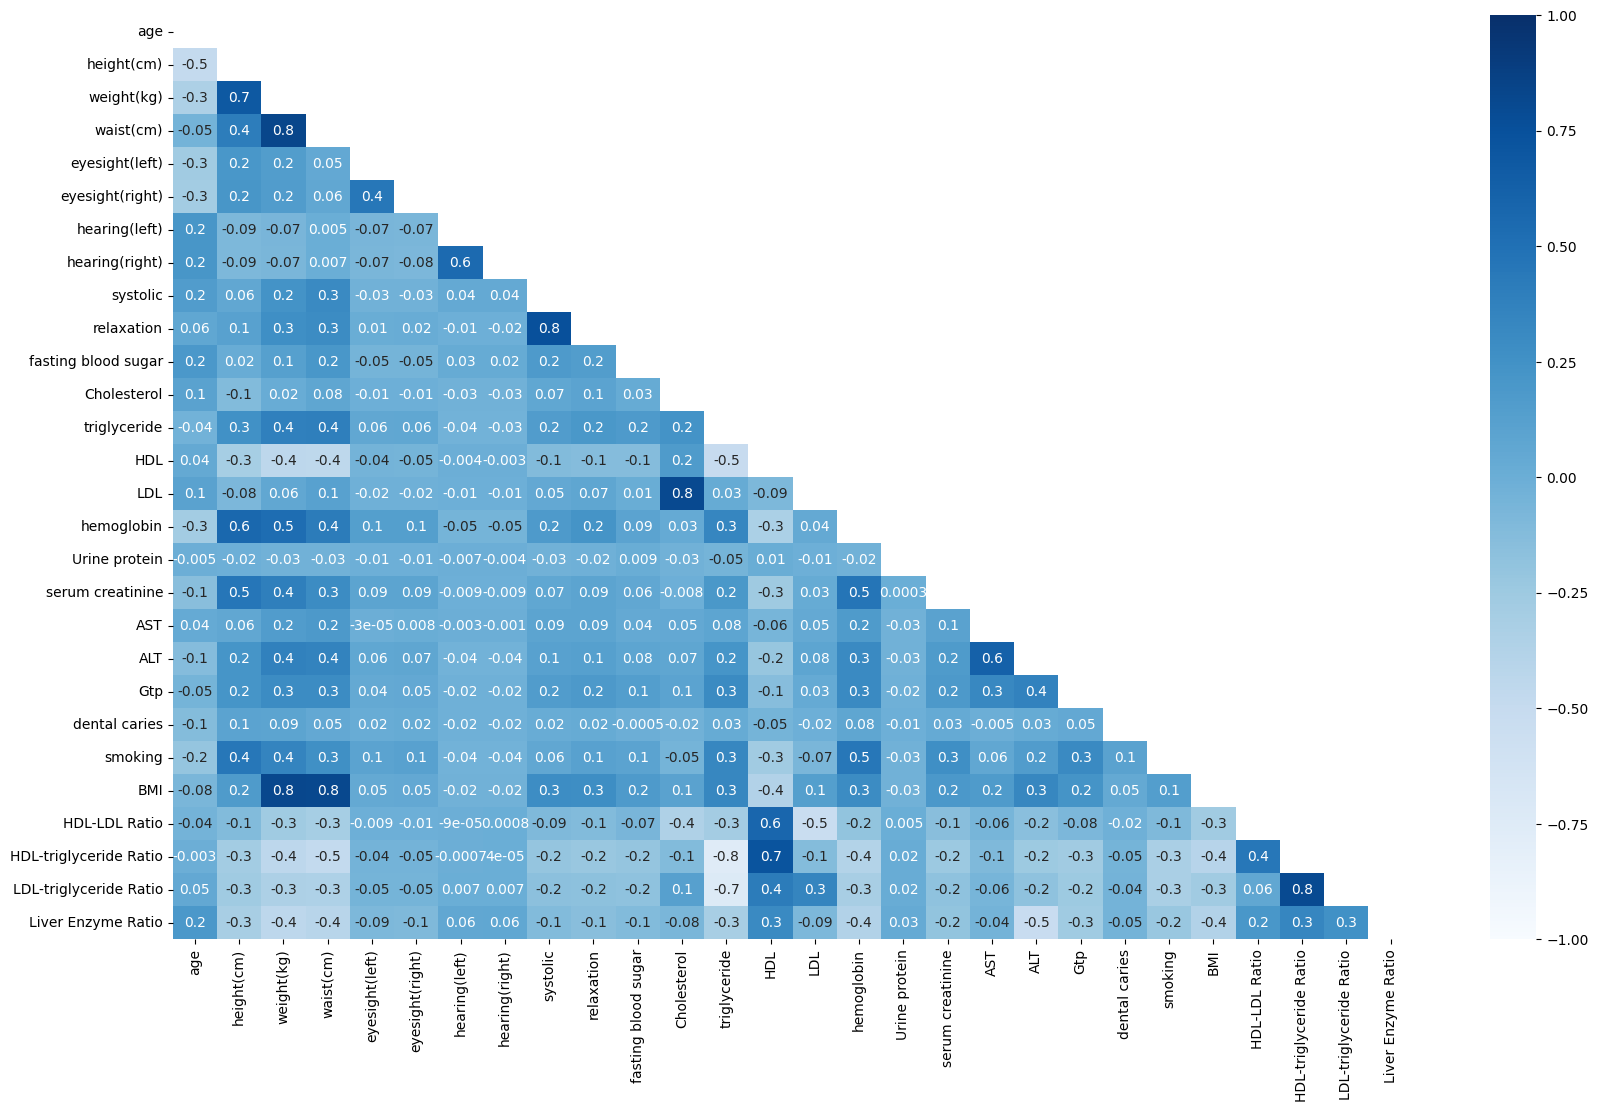

In [ ]:
mask = np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), cmap="Blues", annot=True, mask=mask,vmin=-1,vmax=1,fmt=".1g");

### Dataset Analysis

In [ ]:
fig,axes = plt.subplots(28,2,figsize=(12, 60),dpi=300)

for ind,col in enumerate(data.columns):
    if data[col].nunique()!=2:
        plt.subplot(28,2,2*ind+1)
        sns.histplot(data[col],bins=15,kde=True)
        plt.gca().set_title(col)
    elif col!="smoking":
        plt.subplot(28,2,2*ind+1)
        sns.countplot(data = data,x=col,hue="smoking")
        plt.gca().set_title(col)
    else:
        plt.subplot(28,2,2*ind+1)
        sns.countplot(data = data,x=col)
        plt.gca().set_title(col)

    if data[col].nunique()!=2:
        plt.subplot(28,2,2*ind+2)
        sns.boxplot(data[col],orient="h",palette="Blues")
        plt.gca().set_title(col)
    else:
        plt.subplot(28,2,2*ind+2)
        sns.histplot(binwidth=0.5, x="dental caries", hue="smoking", data=data, stat="count", multiple="stack",palette="Blues")
        plt.gca().set_title(col)

fig.tight_layout()
plt.show()

# Performing Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled Input Features:\n",X_scaled)

In [ ]:
scaler = StandardScaler()

data["weight(kg)"] = scaler.fit_transform(data[["weight(kg)"]])
data["waist(cm)"] = scaler.fit_transform(data[["waist(cm)"]])

print("Scaled Input Features: 'weight(kg)','waist(cm)'")
data.head()

Scaled Input Features: 'weight(kg)','waist(cm)'


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,serum creatinine,AST,ALT,Gtp,dental caries,BMI,HDL-LDL Ratio,HDL-triglyceride Ratio,LDL-triglyceride Ratio,Liver Enzyme Ratio
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,-0.567581,-0.223489,0.5,0.6,1,1,135,87,...,1.0,22,25,27,0,22.038567,0.533333,0.133333,0.250000,0.880000
1,70,165,-0.170319,0.669577,0.6,0.7,2,2,146,83,...,1.1,27,23,37,1,23.875115,0.452381,1.036364,2.290909,1.173913
2,20,170,0.624205,-0.223489,0.4,0.5,1,1,118,75,...,0.8,27,31,53,0,25.951557,0.483871,0.228426,0.472081,0.870968
3,35,180,2.213252,2.455708,1.5,1.2,1,1,131,88,...,1.0,20,27,30,1,29.320988,0.372549,0.187192,0.502463,0.740741
4,30,165,-0.567581,-0.279305,1.5,1.0,1,1,121,76,...,0.8,19,13,17,0,22.038567,0.473118,0.505747,1.068966,1.461538


# Training Models

In [ ]:
X = data.drop("smoking", axis=1)
y = data["smoking"]
print("Input Features:",list(X.columns))
print("Target Feature:", "smoking")

seed = np.random.seed(6)

Input Features: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'BMI', 'HDL-LDL Ratio', 'HDL-triglyceride Ratio', 'LDL-triglyceride Ratio', 'Liver Enzyme Ratio']
Target Feature: smoking


### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=seed)
print("Size of train-set is:",len(X_train))
print("Size of test-set is:",len(X_test))

Size of train-set is: 111479
Size of test-set is: 47777


#### 1. Baseline LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
print(classification_report(y_test,logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     26770
           1       0.71      0.71      0.71     21007

    accuracy                           0.74     47777
   macro avg       0.74      0.74      0.74     47777
weighted avg       0.74      0.74      0.74     47777



#### 2. Baseline XGB

In [ ]:
xgbmodel = XGBClassifier(random_state=seed)
xgbmodel.fit(X_train,y_train)
print(classification_report(y_test,xgbmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79     17682
           1       0.73      0.80      0.77     14170

    accuracy                           0.78     31852
   macro avg       0.78      0.78      0.78     31852
weighted avg       0.79      0.78      0.78     31852



#### 3. Baseline LGBM

In [ ]:
lgbmmodel = LGBMClassifier(random_state=seed,verbose=0)
lgbmmodel.fit(X_train,y_train)
print(classification_report(y_test,lgbmmodel.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
              precision    recall  f1-score   support

           0       0.84      0.76      0.79     17682
           1       0.73      0.81      0.77     14170

    accuracy                           0.78     31852
   macro avg       0.78      0.79      0.78     31852
weighted avg       0.79      0.78      0.78     31852



#### 4. Gaussian Naive Bayes

In [ ]:
gnbmodel = GaussianNB()
gnbmodel.fit(X_train,y_train)
print(classification_report(y_test,gnbmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74     17682
           1       0.67      0.79      0.72     14170

    accuracy                           0.73     31852
   macro avg       0.73      0.74      0.73     31852
weighted avg       0.74      0.73      0.73     31852



#### 5. Soft-Voting XGB+LGBM

In [ ]:
vcmodel = VotingClassifier([("lgbm",lgbmmodel),("xgb",xgbmodel)],voting="soft",weights=[1,1])
vcmodel.fit(X_train,y_train)
print(classification_report(y_test,vcmodel.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     17682
           1       0.73      0.81      0.77     14170

    accuracy                           0.78     31852
   macro avg       0.78      0.79      0.78     31852
weighted avg       0.79      0.78      0.78     31852



#### 6. Hard-Voting XGB+LGBM

In [ ]:
vcmodel = VotingClassifier([("lgbm",lgbmmodel),("xgb",xgbmodel)],voting="hard",weights=[1,1])
vcmodel.fit(X_train,y_train)
print(classification_report(y_test,vcmodel.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     17682
           1       0.75      0.78      0.76     14170

    accuracy                           0.78     31852
   macro avg       0.78      0.78      0.78     31852
weighted avg       0.78      0.78      0.78     31852



#### 7. Stacking XGB+LGBM

In [ ]:
scmodel = StackingClassifier([("lgbm",lgbmmodel),("xgb",xgbmodel)],cv=5)
scmodel.fit(X_train,y_train)
print(classification_report(y_test,scmodel.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     17682
           1       0.74      0.79      0.77     14170

    accuracy                           0.78     31852
   macro avg       0.78      0.78      0.78     31852
weighted avg       0.79      0.78      0.78     31852



#### 8. Grid Search CV Tuning RandomForest

In [ ]:
grid = {
          'max_depth': [10, 20],
          'min_samples_leaf': [2, 4],
          'min_samples_split': [2, 5],
          'n_estimators': [50, 100]
          }

rfmodel = RandomForestClassifier()
rf_grid = GridSearchCV(rfmodel, param_grid = grid, cv = 2,verbose=5)
rf_grid.fit(X, y)
print("\n","-"*50,"\n")
print(classification_report(y_test,rf_grid.predict(X_test)))

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.768 total time=  11.8s
[CV 2/2] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.770 total time=   8.8s
[CV 1/2] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.769 total time=  17.3s
[CV 2/2] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.769 total time=  16.6s
[CV 1/2] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.768 total time=   8.3s
[CV 2/2] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.769 total time=   8.5s
[CV 1/2] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.768 total time=  16.6s
[CV 2/2] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.769 total time=  20.0s

#### 8. Randomized Search CV Tuning RandomForest

In [ ]:
rf_random = RandomizedSearchCV(rfmodel, param_distributions = grid, cv = 4,verbose=5, random_state=seed, n_jobs = -1)
rf_random.fit(X, y)
print("\n","-"*50,"\n")
print(classification_report(y_test,rf_random.predict(X_test)))

Fitting 4 folds for each of 10 candidates, totalling 40 fits

 -------------------------------------------------- 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     17682
           1       0.89      0.97      0.93     14170

    accuracy                           0.94     31852
   macro avg       0.94      0.94      0.94     31852
weighted avg       0.94      0.94      0.94     31852



#### 9. Optuna Tuning XGB

In [ ]:
# def objective(trial):
#     params = {
#         'n_estimators' : trial.suggest_int('n_estimators',500,750),
#         'max_depth':  trial.suggest_int('max_depth',3,50),
#         'min_child_weight': trial.suggest_float('min_child_weight', 2,50),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2,log=True),
#         'subsample': trial.suggest_float('subsample', 0.2, 1),
#         'gamma': trial.suggest_float("gamma", 1e-4, 1.0),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#         "colsample_bylevel" : trial.suggest_float('colsample_bylevel',0.2,1),
#         "colsample_bynode" : trial.suggest_float('colsample_bynode',0.2,1),
#     }
#     xgbmodel_optuna = XGBClassifier(**params,random_state=seed,tree_method = "gpu_hist",eval_metric= "auc")
#     cv = cross_val_score(xgbmodel_optuna, X, y, cv = 4,scoring='roc_auc').mean()
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100,timeout=5000)

In [ ]:
# Parameters returned by optuna-tuning
xgb_params =   {'n_estimators': 527, 'max_depth': 44, 'min_child_weight': 42.394074475465935,
                'learning_rate': 0.018945904767046495, 'subsample': 0.9976305222111156,
                'gamma': 0.23054785929528437, 'colsample_bytree': 0.4156956766282452,
                'colsample_bylevel': 0.9225226228188033, 'colsample_bynode': 0.686558727709571}

xgb_opt = XGBClassifier(**xgb_params,random_state=seed,)
xgb_opt.fit(X_train,y_train)
print(classification_report(y_test,xgb_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     26770
           1       0.73      0.82      0.77     21007

    accuracy                           0.79     47777
   macro avg       0.78      0.79      0.78     47777
weighted avg       0.79      0.79      0.79     47777



### Performing K-Fold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

best_beta = None
best_r2_score = -1
for tr, val in kf.split(X):
    X_tr, X_ts, y_tr, y_ts = X.iloc[tr,:],X.iloc[val,:],y.iloc[tr],y.iloc[val]
    model = LogisticRegression()
    model.fit(X_tr, y_tr)
    beta = model.coef_
    predicted_values = model.predict(X_ts)
    r2 = r2_score(y_ts, predicted_values)
    if r2 > best_r2_score:
        best_r2_score = r2
        best_beta = beta
print("Iteration Results:")
print("Beta Matrix:",beta)
print("Predicted Values:",predicted_values)
print("R2 Score:", r2)

Iteration Results:
Beta Matrix: [[-6.93284191e-03 -1.56763904e-02  1.18207575e-01  4.48927214e-03
  -2.45502346e-03 -9.38558435e-05 -6.60736005e-03 -6.98814477e-03
  -6.14719822e-03 -3.43935899e-03  7.15441901e-03  3.87123603e-03
   3.86873236e-03 -1.75849126e-02 -1.19093621e-02  3.26516338e-01
  -2.00664653e-02  1.98949021e-02 -2.02432050e-03 -8.26680250e-03
   2.14483312e-02  4.16018684e-02 -3.92229948e-01 -1.02241642e-03
  -3.60649136e-02 -6.40323351e-02 -2.27235542e-02]]
Predicted Values: [1 0 0 ... 1 0 0]
R2 Score: -0.04332364226804808


In [ ]:
logmodel_kfold = LogisticRegression()
logmodel_kfold.coef_ = best_beta
logmodel_kfold.fit(X_train, y_train)
print(classification_report(y_test,logmodel_kfold.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     26824
           1       0.70      0.72      0.71     20953

    accuracy                           0.74     47777
   macro avg       0.74      0.74      0.74     47777
weighted avg       0.75      0.74      0.74     47777



### Gradient Descent

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.44, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.68, random_state=42)

In [ ]:
def gradient_descent(X, y, learning_rate, iterations):
    n = X.shape[0]
    m = X.shape[1]
    beta = np.zeros(m)
    for _ in range(iterations):
        y_pred = np.dot(X, beta)
        error = y - y_pred
        gradient = -2/n * np.dot(X.T, error)
        beta -= learning_rate * gradient
    return beta
learning_rates = [0.001, 0.01, 0.1, 1]
best_r2_score = -float("inf")
best_beta = None

In [ ]:
best_r2_score = -float('inf')
best_beta = None

for learning_rate in learning_rates:
    # Perform gradient descent
    beta = gradient_descent(X_train, y_train, learning_rate, iterations=1000)

    y_pred_val = np.dot(X_val, beta)

    valid_samples = ~np.isnan(y_pred_val)
    y_val_filtered = y_val[valid_samples]
    y_pred_val_filtered = y_pred_val[valid_samples]

    if len(y_val_filtered) > 0:
        r2_val = r2_score(y_val_filtered, y_pred_val_filtered)

        if r2_val > best_r2_score:
            best_r2_score = r2_val
            best_beta = beta
    else:
        print(f"No valid samples left for learning rate {learning_rate}\n")

y_pred_test = np.dot(X_test, best_beta)
final_r2_score = r2_score(y_test, y_pred_test)
print(f"Best R-squared Score on Validation Set: {best_r2_score:.4f}")
print(f"R-squared Score on Test Set using Best Beta: {final_r2_score:.4f}")
print(f"Best Beta Coefficients: {best_beta}")



No valid samples left for learning rate 1
Best R-squared Score on Validation Set: -0.4615
R-squared Score on Test Set using Best Beta: -0.4619
Best Beta Coefficients: [-0.00393559  0.14835219 -0.07281045  0.00717665 -0.00187168  0.00602689
  0.00197301 -0.00198243 -0.03058994  0.01523395  0.01509873 -0.03619385
  0.06476728 -0.01036476  0.01081932  0.10689188 -0.00754636  0.00545522
 -0.01948277 -0.00058874  0.0797985   0.0281297   0.02166774  0.00398194
 -0.00496603 -0.03191176  0.01000644]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_features = X_train_scaled.shape[1]
weights = np.zeros(n_features)
bias = 0
def ridge_cost_function(X, y, weights, bias, alpha):
    n_samples = X.shape[0]
    predictions = np.dot(X, weights) + bias
    error = predictions - y
    cost = (1 / (2 * n_samples)) * (np.sum(error ** 2) + alpha * np.sum(weights ** 2))
    return cost
def ridge_gradient_descent(X, y, weights, bias, alpha, learning_rate, num_iterations):
    n_samples = X.shape[0]
    for i in range(num_iterations):
        predictions = np.dot(X, weights) + bias
        error = predictions - y
        weights_gradient = (1 / n_samples) * (np.dot(X.T, error) + alpha * weights)
        bias_gradient = (1 / n_samples) * np.sum(error)
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient
    return weights, bias
alpha = 0.01  # Regularization parameter
learning_rate = 0.01
num_iterations = 1000
weights, bias = ridge_gradient_descent(X_train_scaled, y_train, weights, bias, alpha, learning_rate, num_iterations)
predictions = np.dot(X_test_scaled, weights) + bias
mse = np.mean((predictions - y_test) ** 2)
r2_score = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score)

Mean Squared Error: 0.16667122824143732
R2 Score: 0.3251102792001105


### Lasso and Ridge Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_features = X_train_scaled.shape[1]
weights = np.zeros(n_features)
bias = 0
def ridge_cost_function(X, y, weights, bias, alpha):
    n_samples = X.shape[0]
    predictions = np.dot(X, weights) + bias
    error = predictions - y
    cost = (1 / (2 * n_samples)) * (np.sum(error ** 2) + alpha * np.sum(weights ** 2))
    return cost
def ridge_gradient_descent(X, y, weights, bias, alpha, learning_rate, num_iterations):
    n_samples = X.shape[0]
    for i in range(num_iterations):
        predictions = np.dot(X, weights) + bias
        error = predictions - y
        weights_gradient = (1 / n_samples) * (np.dot(X.T, error) + alpha * weights)
        bias_gradient = (1 / n_samples) * np.sum(error)
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * bias_gradient
    return weights, bias
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
regularization_parameters = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]
best_mse = float('inf')
best_r2_score = float('-inf')
best_learning_rate = None
best_regularization_parameter = None
for learning_rate in learning_rates:
    for regularization_parameter in regularization_parameters:
        weights = np.zeros(n_features)
        bias = 0
        weights, bias = ridge_gradient_descent(X_train_scaled, y_train, weights, bias, regularization_parameter, learning_rate, num_iterations)
        predictions = np.dot(X_test_scaled, weights) + bias
        mse = np.mean((predictions - y_test) ** 2)
        r2_score = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
        if mse < best_mse and r2_score > best_r2_score:
            best_mse = mse
            best_r2_score = r2_score
            best_learning_rate = learning_rate
            best_regularization_parameter = regularization_parameter
print("Best Learning Rate:", best_learning_rate)
print("Best Regularization Parameter:", best_regularization_parameter)
print("Best Mean Squared Error:", best_mse)
print("Best R2 Score:", best_r2_score)

Best Learning Rate: 0.1
Best Regularization Parameter: 1e-15
Best Mean Squared Error: 0.9236117018315382
Best R2 Score: 0.017428171156718908


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv.fit(X_train, y_train)
ridge_score = ridge_cv.score(X_test, y_test)

lasso_cv = LassoCV(alphas=[0.1, 1.0, 10.0])
lasso_cv.fit(X_train, y_train)
lasso_score = lasso_cv.score(X_test, y_test)

print("RidgeCV R2 Score:", ridge_score)
print("LassoCV R2 Score:",lasso_score)


RidgeCV R2 Score: 0.3255650290813049
LassoCV R2 Score: 0.28334727794689696


# Plotting Feature Importance

In [ ]:
def plotImportance(modelNames,models):
    plt.subplots(len(modelNames),1,figsize=(12,6*len(modelNames)),dpi=300)
    for ind,modelName in enumerate(modelNames):
        history = pd.DataFrame()
        history["cols"] = X_test.columns
        if modelNames[ind] == "CatBoost":
            history["imp"] = models[ind].get_feature_importance()
        else:
            history["imp"] = models[ind].feature_importances_
        history.sort_values("imp",inplace=True,ascending=False)
        history.reset_index(drop=True)
        plt.subplot(len(modelNames),1,ind+1)
        sns.barplot(x=history["imp"],y=history["cols"],palette="rocket");
        plt.title("Feature Imporance of "+modelName)

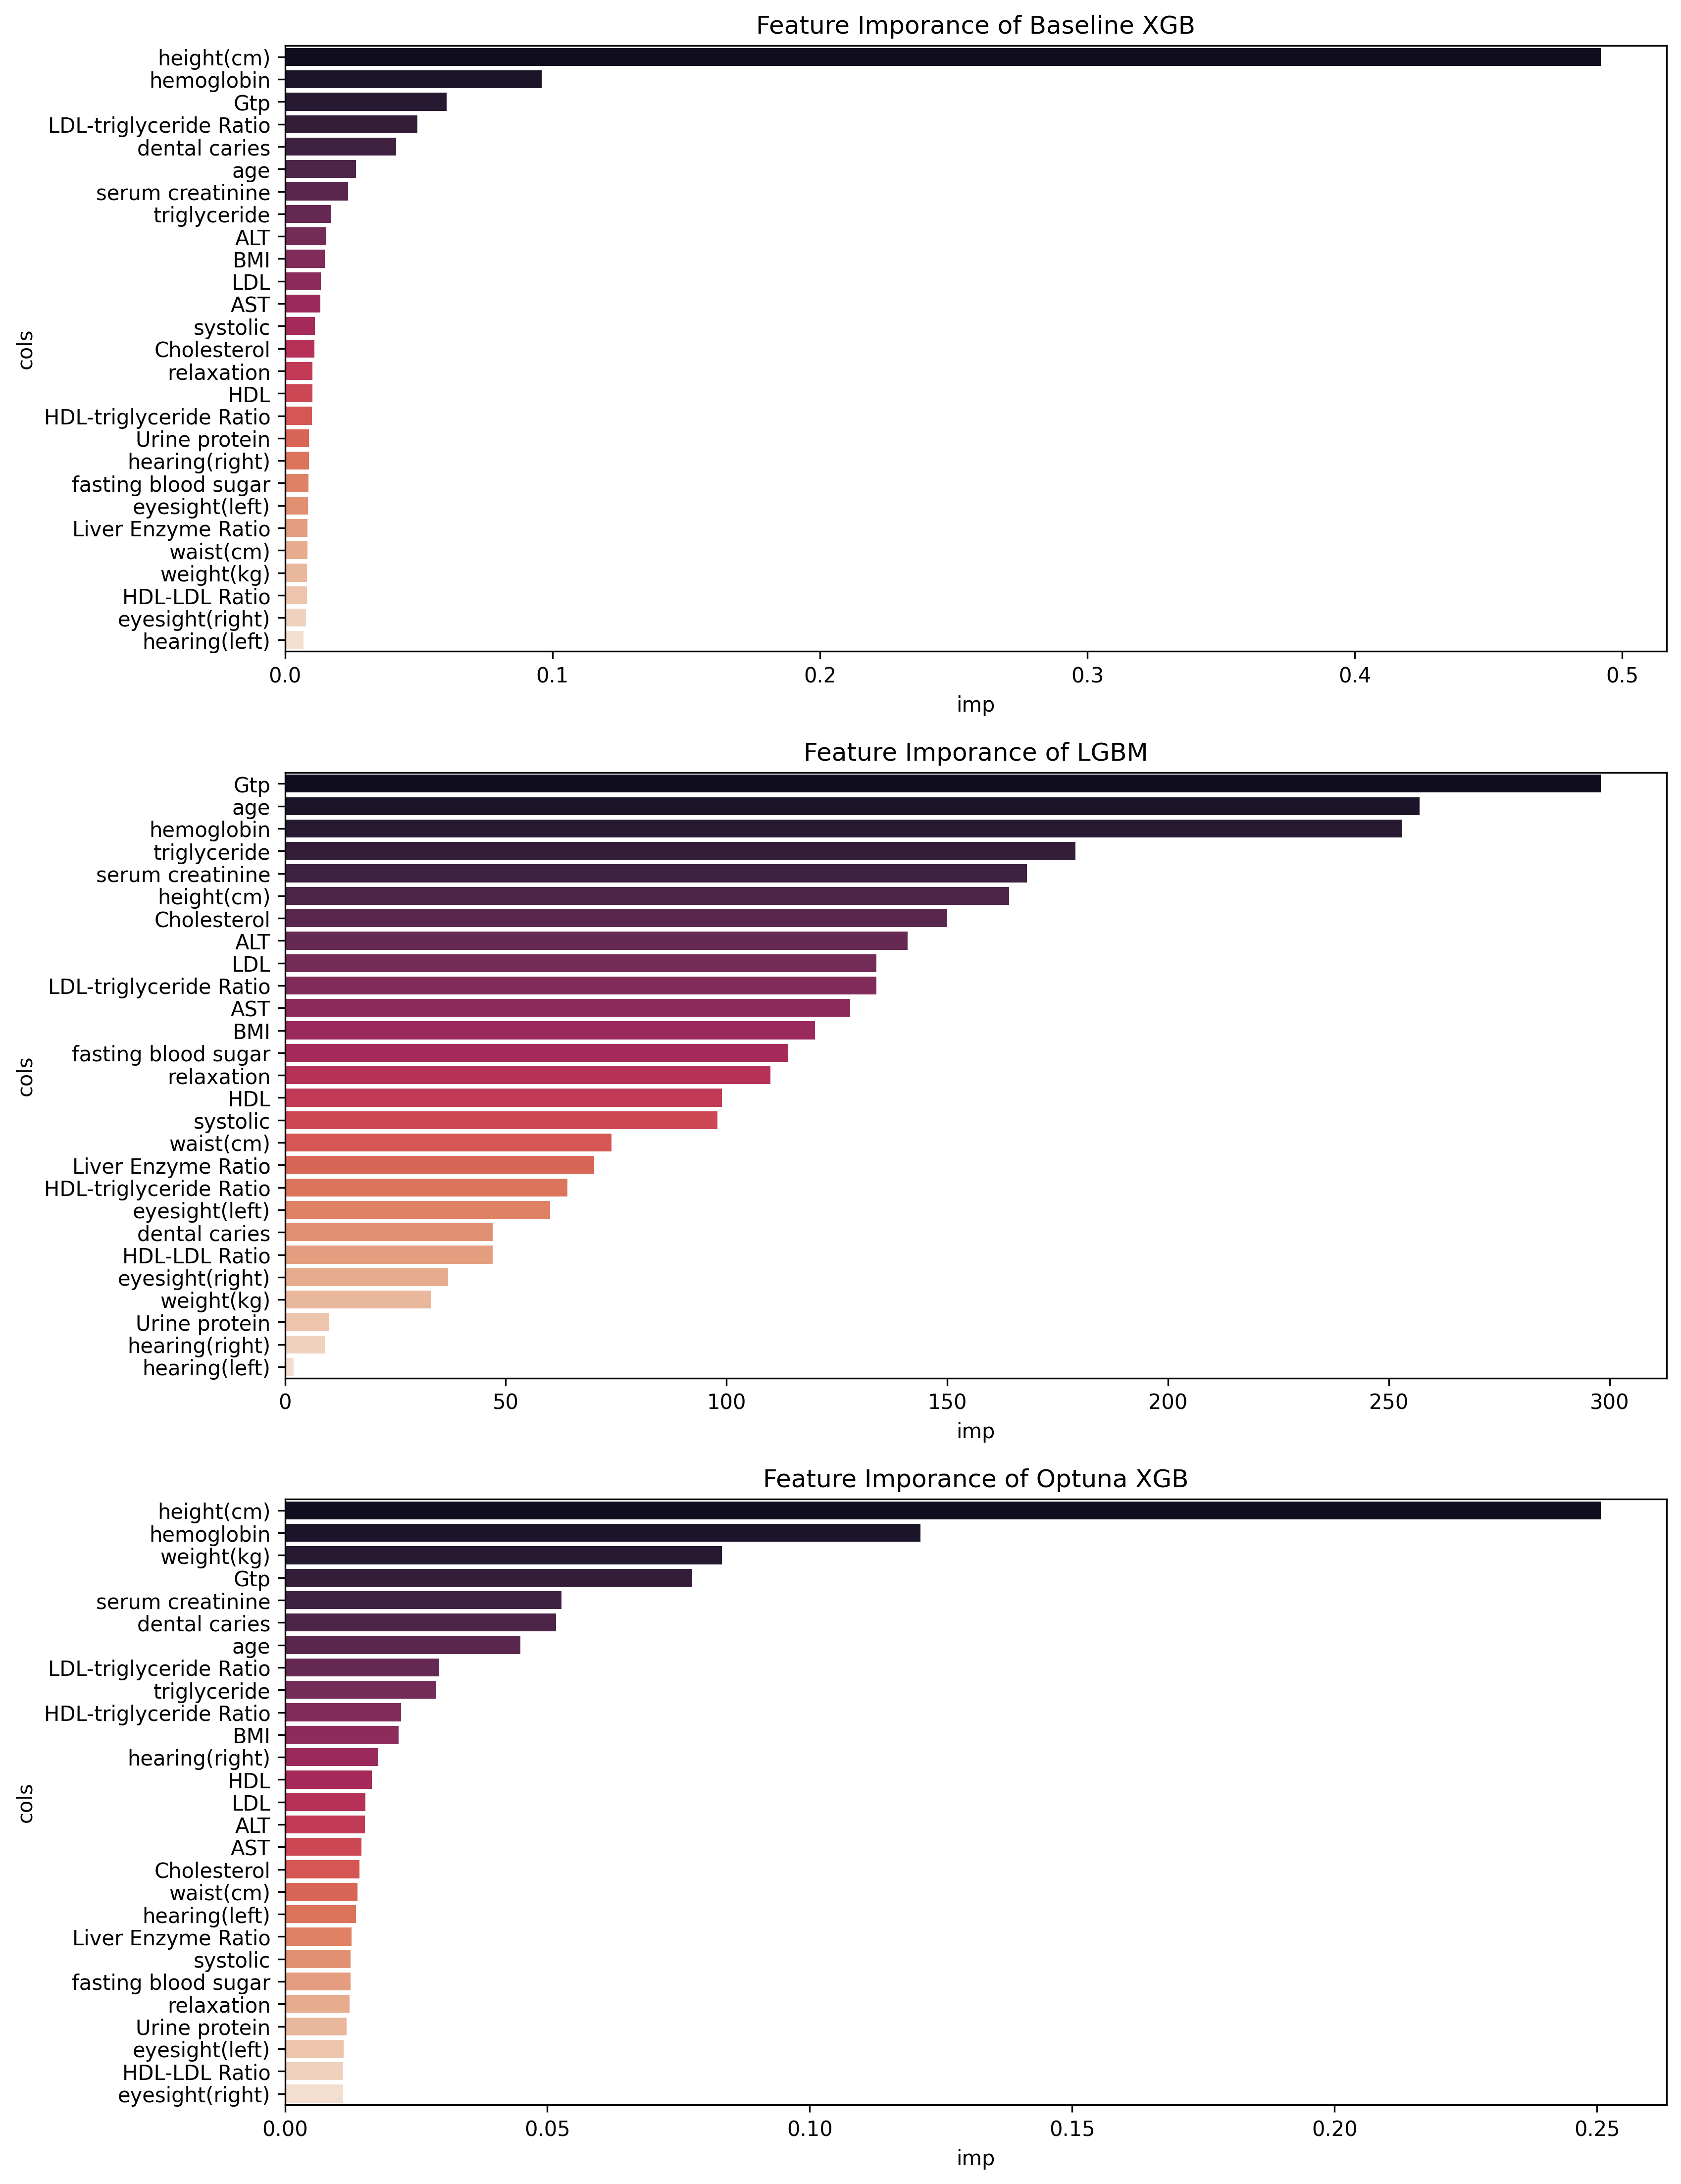

In [ ]:
plotImportance(["Baseline XGB","LGBM","Optuna XGB"],[xgbmodel,lgbmmodel,xgb_opt])